<br>
<br>

### **1**) importiamo le librerie necessarie per eseguire il file

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import import_ipynb
from selected_indicator import select_indicators
from statistics import median

importing Jupyter notebook from selected_indicator.ipynb


<br>
<br>

### **2**) import dataset

In [2]:
# gli indicatori li importiamo dal file select_indicator
select_indicators = select_indicators['wm']
print(select_indicators)

['WB6A', 'WB16', 'MT9', 'MT11', 'CM3', 'CM8', 'CP2', 'UN7', 'UN14N', 'VT9', 'MA1', 'AF10', 'AF11', 'SB2U', 'LS2']


In [3]:
data = pd.read_csv('../data/out/data.csv', index_col=0)
#data.replace([np.inf, -np.inf], np.nan, inplace=True)

#così puliamo il dataset da ogni Nan
data.dropna(inplace=True)
#print(data)

<br>
<br>

### **3**) sezione per descrizione preliminare dati

In [4]:
# sezione per esplorare i dati
len(data)
#stampiamo la shape del dataframe (quante righe e quante colonne)
#data.shape

#stampiamo i primi valori per vedere una bozza del contenuto del df
#data.head()


#oppure stampiamoli tutti
#f,a = plt.subplots(4,2)
#a = a.ravel()
#
#for idx,ax in enumerate(a):
#    ax.hist(data[select_indicators[idx]])
#    ax.set_title(select_indicators[idx])
#plt.tight_layout()

3862

<br>
<br>
<br>

### **4**) Creiamo a partire dagli item le variabili definitive da fornire al modello

- WB6 -> [0,1,2]
- WB16_ville -> [0,1]
- WB16_bourgade -> [0,1]
- WB16_milieuRural -> [0,1]
- MT9 -> [0,1]
- MT11 -> [0,1]
- CM3 -> [0,1,2,3,4]
- CM3_over4 -> [0,1]
- CM8 -> [0,1]
- CP2 -> [0,1]
- UN7 -> [0,1]
- UN14 -> [0,1]
- VT9 -> [0,1]
- MA1 -> [0,1]
- AF10 -> [1,2,3,4]
- AF11 -> [1,2,3,4]
- SB2 -> [1,2,3,4]
- TA16 -> [0,1,2] (non inserito perchè problematico)
- LS2 -> [0,1]

<br>

## WB6

In [8]:
# osserviamo com'è il dato originale
data['WB6A'].head()
#data['WB6A'].hist()
#data['WB6A'].count()

6_Congo_MICS6_1_1_2     2
6_Congo_MICS6_1_7_14    2
6_Congo_MICS6_1_8_2     3
6_Congo_MICS6_1_9_2     2
6_Congo_MICS6_1_16_3    3
Name: WB6A, dtype: Int64

<br>

In [6]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['WB6A'] = data['WB6A'].astype("Int64")
data['WB6A'].head()
#data['WB6A'].count()

6_Congo_MICS6_1_1_2     2
6_Congo_MICS6_1_7_14    2
6_Congo_MICS6_1_8_2     3
6_Congo_MICS6_1_9_2     2
6_Congo_MICS6_1_16_3    3
Name: WB6A, dtype: Int64

In [ ]:
# se presenti valori che non siano

<br>

## WB16

In [41]:
# osserviamo com'è il dato originale e modifichiamo
data['WB16'] = data['WB16'].astype("Int64")
data['WB16'].head()
#data['WB16'].count()

6_Congo_MICS6_1_1_2     0
6_Congo_MICS6_1_7_14    0
6_Congo_MICS6_1_8_2     0
6_Congo_MICS6_1_9_2     0
6_Congo_MICS6_1_16_3    0
Name: WB16, dtype: Int64

<br>

In [9]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
#WB16_ville = []
#for response in data['WB16']:
#    if response == 0:
#        WB16_ville.append(0)
#    else:
#        WB16_ville.append(1)
#data['WB16_ville'] = WB16_ville
#
#
#WB16_bourgade = []
#for response in data['WB16']:
#    if response == 1:
#        WB16_bourgade.append(0)
#    else:
#        WB16_bourgade.append(1)
#data['WB16_bourgade'] = WB16_bourgade
#
#
#WB16_milieuRurale = []
#for response in data['WB16']:
#    if response == 2:
#        WB16_milieuRurale.append(0)
#    else:
#        WB16_milieuRurale.append(1)
#data['WB16_milieuRurale'] = WB16_milieuRurale

<br>

## MT9

<Axes: >

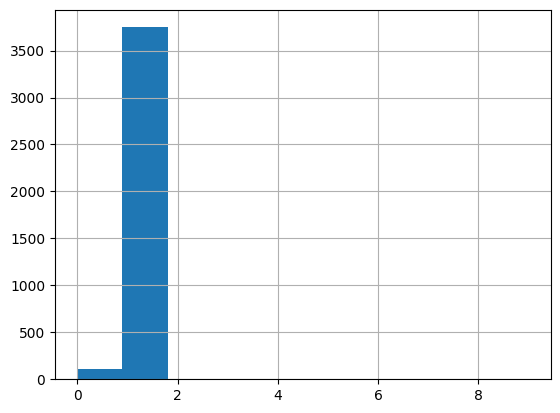

In [43]:
# osserviamo com'è il dato originale
data['MT9'] = data['MT9'].astype("Int64")
data['MT9'].head()
#data['WB16'].count()
data['MT9'].hist()

In [10]:
MT9 = []
for response in data['MT9']:
    if response == 9:
        #eliminiamo righe del dataset (tutto il dataset) che corrispondon alla riga di MT9 dove presenta il valore 9.
        data.drop(data.loc[data['MT9']==response].index, inplace=True)
    else:
        MT9.append(response)

data['MT9'] = MT9

In [11]:
# CODICE DI VERIFICA
# codice per verificare se nel dataset ci sono righe con specifici valori. In questo caso è stato 
# fatto per verificare se l'operazione di rimozione fatta sopra avesse funzionato oppure no.

#count = 0
#for x in data['MT9']:
#    if x == 9:
#        count += 1
#    
#print(count)

<br>

## MT11

In [13]:
# osserviamo com'è il dato originale
data['MT11'] = data['MT11'].astype("Int64")
data['MT11'].head()
#data['MT9'].hist()

6_Congo_MICS6_1_1_2     0
6_Congo_MICS6_1_7_14    0
6_Congo_MICS6_1_8_2     0
6_Congo_MICS6_1_9_2     0
6_Congo_MICS6_1_22_4    1
Name: MT11, dtype: Int64

In [12]:
MT11 = []
for response in data['MT11']:
    if response == 9:
        data.drop(data.loc[data['MT11']==response].index, inplace=True)
    else:
        MT11.append(response)

data['MT11'] = MT11

<br>

## CM3

<Axes: >

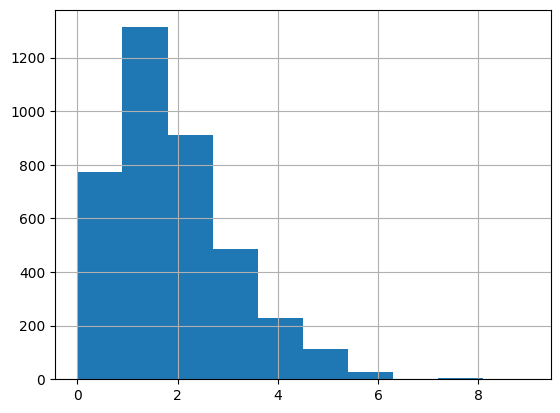

In [13]:
data['CM3'].hist()

In [16]:
# osserviamo com'è il dato originale, lo trasformiamo in int e osserviamo la trasformazione 
data['CM3'] = data['CM3'].astype("Int64")
data['CM3'].head()
#data['MT9'].hist()

6_Congo_MICS6_1_22_4    2
6_Congo_MICS6_2_1_2     2
6_Congo_MICS6_2_12_1    2
6_Congo_MICS6_2_24_2    1
6_Congo_MICS6_2_27_3    0
Name: CM3, dtype: Int64

In [44]:
CM3 = []
for response in data['CM3']:
    if response > 4:
        CM3.append(4)
    else:
        CM3.append(response)

data['CM3'] = CM3

<Axes: >

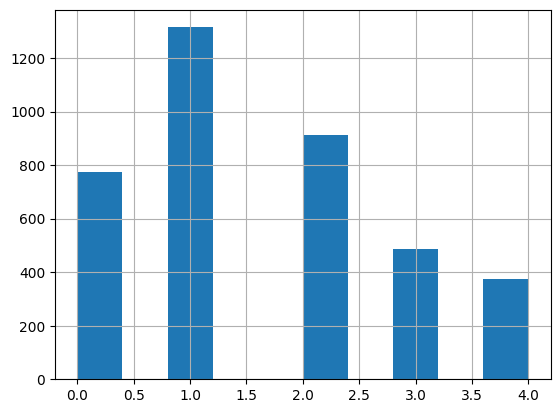

In [45]:
data['CM3'].hist()

<br>

## CM3_over4

In [14]:
CM3_over4 = []
for response in data['CM3']:
    if response == 4:
        CM3_over4.append(1)
    else:
        CM3_over4.append(0)

data['CM3_over4'] = CM3_over4

<br>

## CM8

<Axes: >

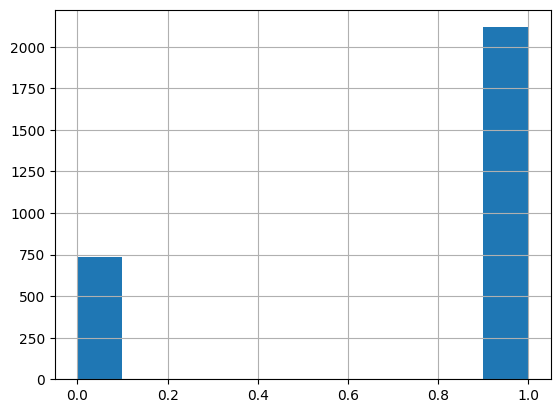

In [20]:
data['CM8'].hist()

<Axes: >

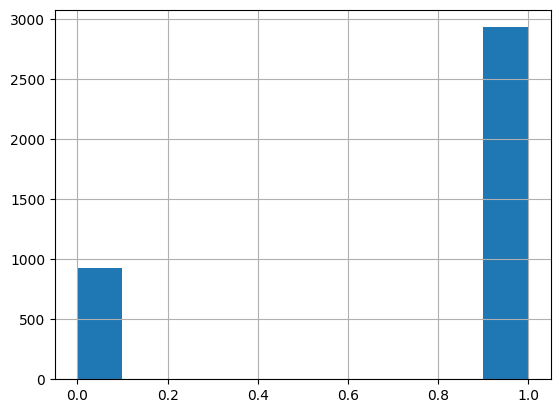

In [16]:
# osserviamo com'è il dato originale, lo trasformiamo in int e osserviamo la trasformazione 
data['CM8'] = data['CM8'].astype("Int64")
data['CM8'].head()
data['CM8'].hist()

<br>

## CP2

In [ ]:
data['CP2'].hist()

In [ ]:
# osserviamo com'è il dato originale
data['CP2'] = data['CP2'].astype("Int64")
data['CP2'].head()
#data['MT9'].hist()

In [ ]:
#CP2 = []
#for response in data['CP2']:
#    if response == 2:
#        CP2.append(1)
#    elif response == 1:
#        CP2.append(0)
#    else:
#        #se ci sono valori che non sono quelli voluti eliminiamo l'intera rows dal dataset
#        data.drop(data.loc[data['CP2']==response].index, inplace=True)
#
#data['CP2'] = CP2

<br>

## UN7

In [ ]:
data['UN7'].hist()

In [23]:
# osserviamo com'è il dato originale
data['UN7'] = data['UN7'].astype("Int64")
data['UN7'].head()
#data['MT9'].hist()

6_Congo_MICS6_1_22_4    1
6_Congo_MICS6_2_1_2     9
6_Congo_MICS6_2_12_1    1
6_Congo_MICS6_2_24_2    0
6_Congo_MICS6_2_27_3    1
Name: UN7, dtype: Int64

In [24]:
#UN7 = []
#for response in data['UN7']:
#    if response == 1:
#        UN7.append(0)
#    elif response == 2:
#        UN7.append(1)
#    else:
#        #se ci sono valori che non sono quelli voluti eliminiamo l'intera rows dal dataset
#        data.drop(data.loc[data['UN7']==response].index, inplace=True)
#
#data['UN7'] = UN7

In [25]:
#data['UN7'].hist()

<br>

## UN14

In [26]:
data.rename(columns={"UN14N": "UN14"}, inplace = True) 

<Axes: >

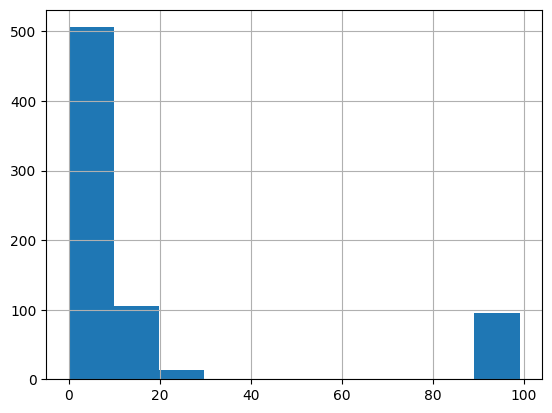

In [27]:
data['UN14'].hist()

In [28]:
# osserviamo com'è il dato originale
data['UN14'] = data['UN14'].astype("Int64")
data['UN14'].head()
#data['UN14'].hist()

6_Congo_MICS6_1_22_4     8
6_Congo_MICS6_2_12_1    12
6_Congo_MICS6_2_27_3     1
6_Congo_MICS6_4_26_2     1
6_Congo_MICS6_6_14_2     1
Name: UN14, dtype: Int64

In [29]:
#UN14 = []
#for response in data['UN14']:
#    if (3 < response < 24):
#        UN14.append(1)
#    elif (response < 3) | (24 < response <30):
#        UN14.append(0)
#    else:
#        #se ci sono valori che non sono quelli voluti eliminiamo l'intera rows dal dataset
#        data.drop(data.loc[data['UN14']==response].index, inplace=True)
#
#data['UN14'] = UN14

<Axes: >

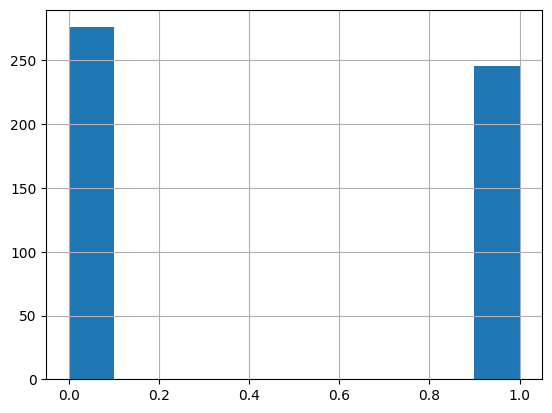

In [30]:
data['UN14'].hist()

<br>

## VT9

<Axes: >

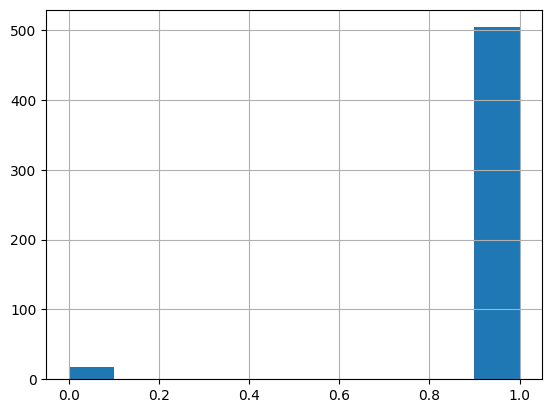

In [31]:
data['VT9'].hist()

In [32]:
# osserviamo com'è il dato originale
data['VT9'] = data['VT9'].astype("Int64")
data['VT9'].head()
#data['VT9'].hist()

6_Congo_MICS6_1_22_4    1
6_Congo_MICS6_2_12_1    1
6_Congo_MICS6_2_27_3    1
6_Congo_MICS6_4_26_2    1
6_Congo_MICS6_6_14_2    1
Name: VT9, dtype: Int64

In [47]:
#VT9 = []
#for response in data['VT9']:
#    if response == 2:
#        VT9.append(1)
#    elif response == 1:
#        VT9.append(0)
#
#data['VT9'] = VT9

<br>

## MA1

In [ ]:
data['MA1'].hist()

In [ ]:
# osserviamo com'è il dato originale
data['MA1'] = data['MA1'].astype("Int64")
data['MA1'].head()
#data['MA1'].hist()

In [ ]:
#MA1 = []
#for response in data['MA1']:
#    if (response == 1) | (response == 2):
#        MA1.append(0)
#    elif (response == 3):
#        MA1.append(1)
#    else:
#        #se ci sono valori che non sono quelli voluti eliminiamo l'intera rows dal dataset
#        data.drop(data.loc[data['MA1']==response].index, inplace=True)
#
#data['MA1'] = MA1

In [ ]:
data['MA1'].hist()

<br>

## AF10

In [ ]:
data['AF10'].hist()

In [ ]:
# osserviamo com'è il dato originale
data['AF10'] = data['AF10'].astype("Int64")
data['AF10'].head()
#data['MA1'].hist()

<br>

## AF11

In [ ]:
data['AF11'].hist()

In [ ]:
# osserviamo com'è il dato originale
data['AF11'] = data['AF11'].astype("Int64")
data['AF11'].head()
#data['MA1'].hist()

<br>

## SB2

In [ ]:
data['SB2U'].hist()

In [ ]:
# osserviamo com'è il dato originale e trasformiamo in int e rinominiamo
data.rename(columns={"SB2U": "SB2"}, inplace = True) 
data['SB2'] = data['SB2'].astype("Int64")
data['SB2'].head()
#data['MA1'].hist()

<br>

## TA16 va risolto come usasre questo item 

In [49]:
#data['TA16'].hist()

In [ ]:
## osserviamo com'è il dato originale e trasformiamo in int e rinominiamo
#data['TA16'] = data['TA16'].astype("Int64")
#data['TA16'].head()
##data['TA16'].hist()

In [ ]:
#TA16 = []
#for response in data['TA16']:
#    if response == 0:
#        TA16.append(0)
#    elif (0 < response < 10):
#        TA16.append(1)
#    elif response == 10:
#        TA16.append(2)
#    elif response == 30:
#        TA16.append(3)
#        #se ci sono valori che non sono quelli voluti eliminiamo l'intera rows dal dataset
#        #data.drop(data.loc[data['TA16']==response].index, inplace=True)
#
#data['TA16'] = TA16

In [ ]:
#data['TA16'].hist()

<br>

## LS2

<Axes: >

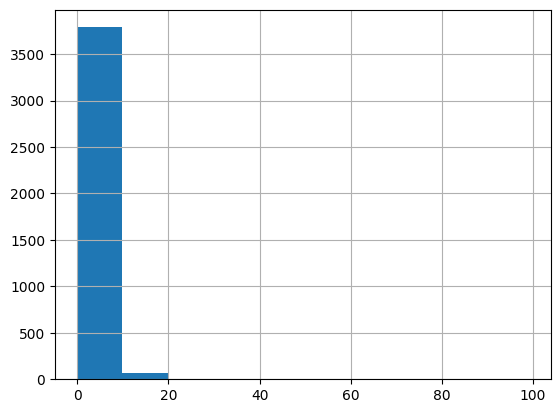

In [5]:
data['LS2'].hist()

In [6]:
# va calcolato mediana, preso quindi valore mediano (VL) come valore per distinguere 0 (tutto ciò che è minore di VL) da 1 (tutto ciò superiore a VL)

In [7]:
# osserviamo com'è il dato originale e trasformiamo in int e rinominiamo
data['LS2'] = data['LS2'].astype("Int64")
data['LS2'].head()
#data['TA16'].hist()

6_Congo_MICS6_1_1_2      8
6_Congo_MICS6_1_7_14     6
6_Congo_MICS6_1_8_2      8
6_Congo_MICS6_1_9_2      6
6_Congo_MICS6_1_16_3    10
Name: LS2, dtype: Int64

In [8]:
for response in data['LS2']:
    if response > 10:
        data.drop(data.loc[data['LS2']==response].index, inplace=True)

In [9]:
mediana = median(data['LS2'])

In [10]:
#data['LS2'].describe()

In [11]:
print(mediana)

5.0


In [12]:
LS2 = []
for response in data['LS2']:
    if response <= 5:
        LS2.append(0)
    else:
        LS2.append(1)

data['LS2'] = LS2

<Axes: >

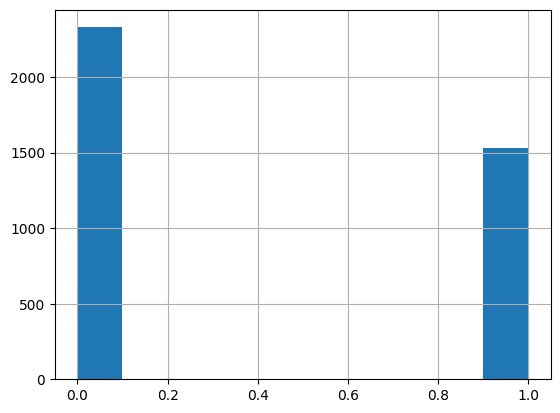

In [13]:
data['LS2'].hist()

In [14]:
data.to_csv(os.path.join('../data/out/out_processing/','data.csv'))